<a href="https://colab.research.google.com/github/selinxxA/Pusula_Selin_Erman/blob/main/Pusula_Staj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("/content/Talent_Academy_Case_DT_2025.xlsx")

print(df.isna().sum())
print(df.isna().sum(axis=1).head())

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64
0    0
1    1
2    1
3    1
4    1
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [5]:
df['Yas'].describe()

,Yas
count,2235.000000
mean,47.327069
std,15.208634
min,2.000000
25%,38.000000
50%,46.000000
75%,56.000000
max,92.000000


In [6]:
df['Cinsiyet'].value_counts()

,count
Cinsiyet,
Kadın,1274
Erkek,792


In [7]:
df['Cinsiyet'].isnull().value_counts()

,count
Cinsiyet,
False,2066
True,169


In [8]:
df["Cinsiyet"] = df.groupby("HastaNo")["Cinsiyet"].transform(lambda x: x.ffill().bfill())
df['Cinsiyet'].isnull().value_counts()

/tmp/ipython-input-518176957.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Cinsiyet"] = df.groupby("HastaNo")["Cinsiyet"].transform(lambda x: x.ffill().bfill())


,count
Cinsiyet,
False,2090
True,145


In [9]:
df['KanGrubu'].value_counts()

,count
KanGrubu,
0 Rh+,579
A Rh+,540
B Rh+,206
AB Rh+,80
B Rh-,68
A Rh-,53
0 Rh-,26
AB Rh-,8


In [10]:
df['KanGrubu'].isnull().value_counts()

,count
KanGrubu,
False,1560
True,675


In [11]:
df["KanGrubu"] = df.groupby("HastaNo")["KanGrubu"].transform(lambda x: x.ffill().bfill())
df['KanGrubu'].isnull().value_counts()

/tmp/ipython-input-2382354413.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["KanGrubu"] = df.groupby("HastaNo")["KanGrubu"].transform(lambda x: x.ffill().bfill())


,count
KanGrubu,
False,1591
True,644


In [12]:
df['Uyruk'].value_counts()

,count
Uyruk,
Türkiye,2173
Tokelau,27
Arnavutluk,13
Azerbaycan,12
Libya,10


In [13]:
df["Uyruk"] = df["Uyruk"].map(lambda x: 1 if x == "Türkiye" else 0)
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,1,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [14]:
df['Uyruk'].value_counts()

,count
Uyruk,
1,2173
0,62


In [15]:
df['KronikHastalik'].value_counts()

,count
KronikHastalik,
Myastenia gravis,38
Aritmi,36
Fascioscapulohumeral Distrofi,36
Hipertiroidizm,34
"Limb-Girdle Musküler Distrofi, Astım",34
...,...
"Fascioscapulohumeral Distrofi, Myastenia gravis",1
"Polimiyozit, Aritmi, Hiportiroidizm",1
"Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm",1


In [16]:
unique_diseases = set(
    disease.strip()
    for row in df["KronikHastalik"].dropna()
    for disease in row.split(",")
)
df["KronikHastalik"] = df["KronikHastalik"].str.replace("Hiportiroidizm", "Hipotirodizm", case=False)
print("Farklı hastalık sayısı:", len(unique_diseases))
print("Hastalık listesi:", unique_diseases)

Farklı hastalık sayısı: 15
Hastalık listesi: {'Hiportiroidizm', 'Hipotirodizm', 'Fascioscapulohumeral Distrofi', 'Myastenia gravis', 'Diyabet', 'Hipertansiyon', 'Hipertiroidizm', 'Limb-Girdle Musküler Distrofi', 'Duchenne Musküler Distrofisi', 'Polimiyozit', 'Becker Musküler Distrofisi', 'Guatr', 'Aritmi', 'Kalp yetmezliği', 'Astım'}


In [17]:
df['Bolum'].value_counts()

,count
Bolum,
"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045
Ortopedi Ve Travmatoloji,88
İç Hastalıkları,32
Nöroloji,17
Kardiyoloji,11
Göğüs Hastalıkları,8
Laboratuar,7
Genel Cerrahi,6
Tıbbi Onkoloji,6


In [18]:
unique_diseases = set(
    disease.strip()
    for row in df["Bolum"].dropna()
    for disease in row.split(",")
)

print("Farklı bölüm sayısı:", len(unique_diseases))
print("Bölüm listesi:", unique_diseases)

Farklı bölüm sayısı: 11
Bölüm listesi: {'Genel Cerrahi', 'Fiziksel Tıp Ve Rehabilitasyon', 'Ortopedi Ve Travmatoloji', 'Kalp Ve Damar Cerrahisi', 'Tıbbi Onkoloji', 'Laboratuar', 'Kardiyoloji', 'İç Hastalıkları', 'Nöroloji', 'Solunum Merkezi', 'Göğüs Hastalıkları'}


In [19]:
df['Alerji'].value_counts()

,count
Alerji,
Polen,198
POLEN,134
Toz,119
"ARVELES,CORASPIN",102
Sucuk,91
NOVALGIN,90
"Polen,Yer Fıstığı",83
TOZ,74
SUCUK,73


In [20]:
df["Alerji"] = df["Alerji"].str.replace("Novalgin", "NOVALGIN", case=False)
df["Alerji"] = df["Alerji"].str.replace("SUCUK", "Sucuk", case=False)
df["Alerji"] = df["Alerji"].str.replace("Polen", "POLEN", case=False)
df["Alerji"] = df["Alerji"].str.replace("GRİPİN", "GRIPIN", case=False)
df["Alerji"] = df["Alerji"].str.replace("Voltaren", "VOLTAREN", case=False)
df["Alerji"] = df["Alerji"].str.replace("Volteren", "VOLTAREN", case=False)

df["Alerji"] = df["Alerji"].str.replace("Toz", "TOZ", case=False)

unique_diseases = set(
    disease.strip()
    for row in df["Alerji"].dropna()
    for disease in row.split(",")
)

print("Farklı alerji sayısı:", len(unique_diseases))
print("Alerji listesi:", unique_diseases)

Farklı alerji sayısı: 9
Alerji listesi: {'GRIPIN', 'Sucuk', 'CORASPIN', 'TOZ', 'NOVALGIN', 'Yer Fıstığı', 'POLEN', 'VOLTAREN', 'ARVELES'}


In [21]:
df['Tanilar'].value_counts()

,count
Tanilar,
"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",149
Omuzun darbe sendromu,128
"İntervertebral disk bozuklukları, tanımlanmamış",116
"DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",96
Eklem ağrısı,51
...,...
"Kas bozuklukları,, başka yerde sınıflanmış hastalıklarda, Spinal stenoz",1
"Menisküs yırtığı, şimdiki ,Kondromalazia patella",1
"Omuzun darbe sendromu,Menisküs yırtığı, şimdiki",1


In [22]:
import re

def normalize(text):
    if not isinstance(text, str) or text.strip() == "":
        return "diğer"

    text = text.lower().strip()

    text = re.sub(r"[\u200b\u200d\u00ad\u00a0_\x00-\x1f]", "", text)
    return text

df["tanilar_norm"] = df["Tanilar"].apply(normalize)


unique_diseases = set(
    disease.strip()
    for row in df["Tanilar"].dropna()
    for disease in row.split(",")
)

print("Farklı tanı sayısı:", len(unique_diseases))
print("Tanı listesi:", unique_diseases)

Farklı tanı sayısı: 294
Tanı listesi: {'', 'Koksartro\u200dz', 'Medial epikondilit', '\u200bPnömoni', 'İntrehepatik safra yolu karsinomu', 'HEMARTROZ', 'Karaciğer nakli', 'SAKRAL VE SAKROKOKSİGEAL BÖLGE', 'Epilepsi', 'Femurun longitudinal redüksiyon defekti', 'Dorsalji', 'Trokanterik bursit', 'Üriner sistemin diğer bozuklukları', 'SERV\xadİKOTORASİK BÖLGE', '\u200bEklem ağrısı', 'Osteoporoz', 'Juvenil ve adölesan idiopatik skolyoz', 'Beyincik malign neoplazmı', 'hemoraji veya enfarktüs olarak tanımlanmamış', 'Ayak bileği ve ayağın diğer ve tanımlanmamış yaralanmaları', 'Birinci karpometakarpal eklemin artrozu', 'Kasın diğer bozuklukları', '\u200bKarın ağrısı diğer ve tanımlanmamış', 'Fobik anksiyete bozukluğu', 'Patellanın rekürren sublüksasyonu', 'Ekstremite ağrısı', 'Parmak diğer kırığı', 'Halluks valgus (kazanılmış)', 'Serebrovasküler hastalıklar', 'Biseps diğer kısımlarının kas ve tendon yaralanması', 'Aterosklerotik kardiyovasküler hastalık', '\u200b diğer', 'di̇ğer', 'Gonartroz [

In [23]:
df['TedaviAdi'].value_counts()

,count
TedaviAdi,
Dorsalji -Boyun+trapez,231
İV DİSK BOZUKLUĞU-BEL,200
Dorsalji 1,140
Dorsalji-Bel,120
Gonartroz-Meniskopati,95
...,...
Aşil Tendiniti sol-1,1
Koksartroz1-1,1
Hemartrotik Diz-Kas Kuvvetlendirme Egzersizi,1


In [24]:
unique_diseases = set(
    disease.strip()
    for row in df["TedaviAdi"].dropna()
    for disease in row.split(",")
)

print("Farklı tedavi sayısı:", len(unique_diseases))
print("Tedavi listesi:", unique_diseases)

Farklı tedavi sayısı: 244
Tedavi listesi: {'', 'Dirsek eklem çıkığı+Kontraktürü', 'Diz Op-Erken Rehabilitasyon', 'SAĞ OMUZ protezi+ el bileği kırığı', 'Sol  ÖÇB Rehabilitasyonu-1', 'Yaygın kuvvetsizlik-Yürüme egzersizleri', 'Dorsalji', 'Trokanterik bursit', 'servikal Disk Hernisi', 'Ön çapraz bağ rehabilitasyonu', 'Patellar gevşetme+quadriseps güçsüzlüğü', 'Mallet finger+ algonörodistrofi', 'Gonartroz-Meniskopati + kalkaneal Spur', 'Boyun-Düşük kol', 'Postop Diz Artroskopi-Sol', 'Sağ hemipleji', 'Kondromalezi patella-2', 'İV DİSK BOZUKLUĞU-BEL-2', 'Malleol kırığı-2', 'EL REHABİLİTASYONU', 'Algonörodistrofi Sol Ayak', 'impingement Sol', 'Kalkaneal Spur-2', 'impingement sağ', 'Tendinit-tenosinovit-1', 'Sol Meralgia parestetika', 'Diz Menisküs Erken mobilizasyon', 'Parapleji-Tetrapleji', 'Sol diz Post Op-Geç Dönme', 'Gonartroz', 'Sol omuz İmpingemen Post op', 'TFCC rehabilitasyonu', 'İmpimgement send', 'Sağ omuz impingement', 'Lenfödem+ekstremite ağrısı', 'DENEME', 'Diz implantı', 'Kalça 

In [25]:
df.columns = df.columns.str.strip()

df["Tedavi_suresi"] = df["TedaviSuresi"].astype(str).str.extract(r"(\d+)")[0].astype(int)

print(df["Tedavi_suresi"])
df.drop(columns=['TedaviSuresi'], inplace=True)

0        5
1       15
2       15
3       15
4       15
        ..
2230    15
2231    15
2232    15
2233    15
2234    15
Name: Tedavi_suresi, Length: 2235, dtype: int64


In [26]:
df['Tedavi_suresi'].describe()

,Tedavi_suresi
count,2235.000000
mean,14.570917
std,3.725322
min,1.000000
25%,15.000000
50%,15.000000
75%,15.000000
max,37.000000


In [28]:
df['UygulamaYerleri'].value_counts()

,count
UygulamaYerleri,
Bel,528
Boyun,363
Diz,177
Sol Omuz Bölgesi,137
Sağ Omuz Bölgesi,127
Sol El Bilek Bölgesi,83
Sırt,75
Sağ Ayak Bileği Bölgesi,61
Sol Ayak Bileği Bölgesi,58


In [29]:
unique_diseases = set(
    disease.strip()
    for row in df["UygulamaYerleri"].dropna()
    for disease in row.split(",")
)

print("Farklı tedavi sayısı:", len(unique_diseases))
print("Tedavi listesi:", unique_diseases)

Farklı tedavi sayısı: 23
Tedavi listesi: {'Sol Dirsek Bölgesi', 'Ayak Bileği', 'Sağ Kalça Bölgesi', 'Sol Ayak Bileği Bölgesi', 'Sağ Diz Bölgesi', 'Kalça', 'Yüz', 'Dirsek', 'Bel', 'Sırt', 'Sağ Dirsek Bölgesi', 'Diz', 'Sağ El Bilek Bölgesi', 'Sağ Omuz Bölgesi', 'El Bilek', 'Sol Kalça Bölgesi', 'Boyun', 'Sağ Ayak Bileği Bölgesi', 'Omuz', 'Sol Omuz Bölgesi', 'Sol El Bilek Bölgesi', 'Tüm Vücut Bölgesi', 'Sol Diz Bölgesi'}


In [31]:
df.columns = df.columns.str.strip()

df["Uygulama_suresi"] = df["UygulamaSuresi"].astype(str).str.extract(r"(\d+)")[0].astype(int)
print(df["Uygulama_suresi"])
df.drop(columns=['UygulamaSuresi'], inplace=True)

0       20
1       20
2       20
3        5
4       20
        ..
2230    10
2231    20
2232    20
2233    15
2234     5
Name: Uygulama_suresi, Length: 2235, dtype: int64


In [32]:
df['Uygulama_suresi'].describe()

,Uygulama_suresi
count,2235.000000
mean,16.573154
std,6.268635
min,3.000000
25%,10.000000
50%,20.000000
75%,20.000000
max,45.000000


Boxplot Grafikleri

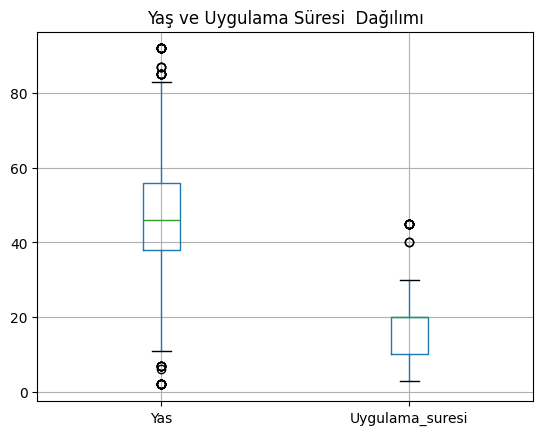

In [33]:
df[["Yas","Uygulama_suresi"]].boxplot()
plt.title("Yaş ve Uygulama Süresi  Dağılımı")
plt.show()

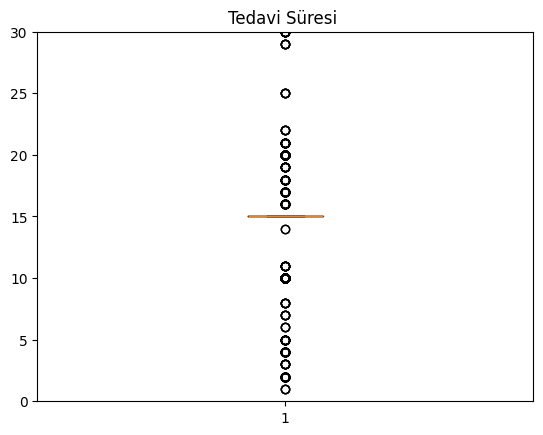

In [34]:
plt.boxplot(df["Tedavi_suresi"])
plt.ylim(0,30)
plt.title("Tedavi Süresi ")
plt.show()

Histogram

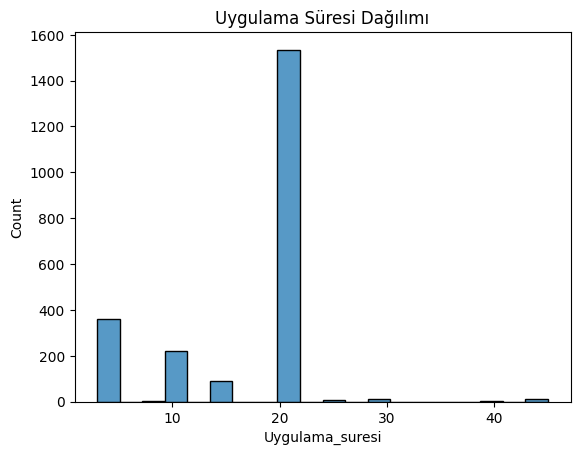

In [35]:
sns.histplot(df["Uygulama_suresi"], bins=20, kde=False)
plt.title("Uygulama Süresi Dağılımı")
plt.show()

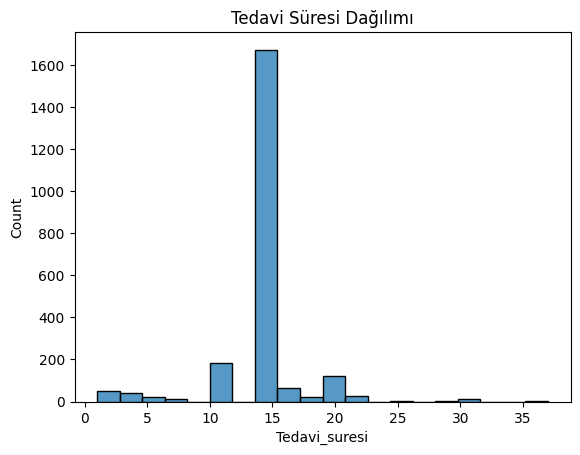

In [36]:
sns.histplot(df["Tedavi_suresi"], bins=20, kde=False)
plt.title("Tedavi Süresi Dağılımı")
plt.show()

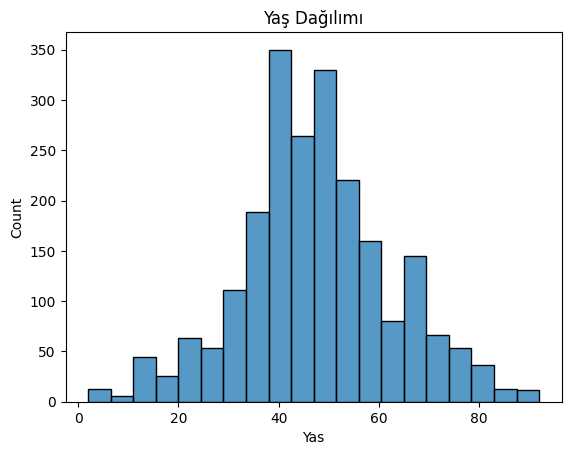

In [37]:
sns.histplot(df["Yas"], bins=20, kde=False)
plt.title("Yaş Dağılımı")
plt.show()

In [38]:
df["Alerji"] = df["Alerji"].fillna("Unknown")
df_unique = df.groupby("HastaNo")["Alerji"].apply(lambda x: ",".join(x.unique())).reset_index()
df_allergy = df["Alerji"].str.get_dummies(sep=",")
allergy_counts = df_allergy.sum().sort_values(ascending=False)




In [39]:
df.drop(columns=['Alerji'], inplace=True)
df=pd.concat([df, df_allergy], axis=1)

In [40]:
df.drop(columns=['Unknown'], inplace=True)
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Tanilar,TedaviAdi,UygulamaYerleri,...,Uygulama_suresi,ARVELES,CORASPIN,GRIPIN,NOVALGIN,POLEN,Sucuk,TOZ,VOLTAREN,Yer Fıstığı
0,145134,60,Kadın,0 Rh+,1,"Becker Musküler Distrofisi, Hipotirodizm, Kalp...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği,...,20,0,0,0,0,0,0,1,0,0
1,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,...,20,0,0,0,0,0,0,0,0,0
2,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt",...,20,0,0,0,0,0,0,0,0,0
3,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,Boyun,...,5,0,0,0,0,0,0,0,0,0
4,145135,28,Erkek,0 Rh+,1,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt",...,20,0,0,0,0,0,0,0,0,0


In [41]:
df["Cinsiyet_binary"] = np.where(df["Cinsiyet"].isna(), 2,
                                 np.where(df["Cinsiyet"] == "Erkek", 1, 0))

In [42]:
df.drop(columns=['Cinsiyet'], inplace=True)

In [44]:
df.drop(columns=['KanGrubu',"KanGrubuSimplified"], inplace=True)

KeyError: "['KanGrubuSimplified'] not found in axis"

In [ ]:
df=pd.concat([df, df_onehot], axis=1)

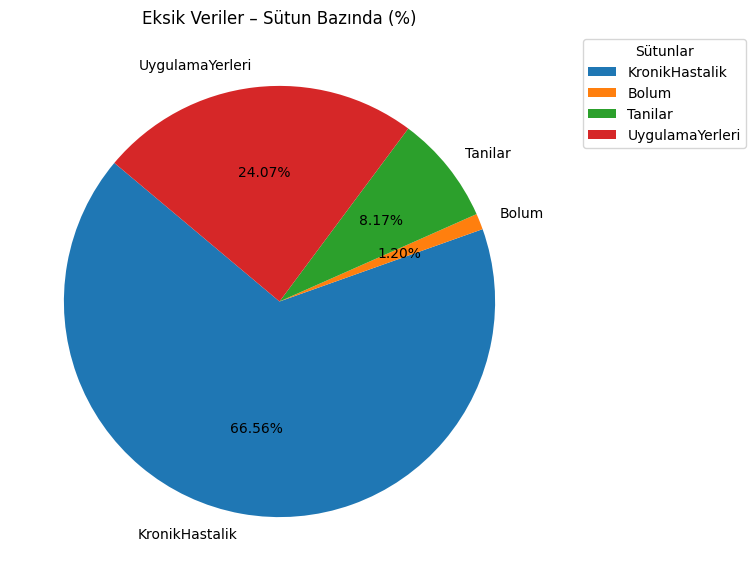

In [ ]:
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # sadece eksik olan sütunlar
missing_percent = (missing_counts / len(df) * 100).round(2)

plt.figure(figsize=(7,7))
plt.pie(
    missing_counts,
    labels=missing_counts.index,
    autopct=lambda p: f'{p:.2f}%',
    startangle=140
)
plt.title("Eksik Veriler – Sütun Bazında (%)")
plt.legend(missing_counts.index, title="Sütunlar", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

